

# Homework: Naive Bayes 

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

## Name: <span style="color:blue"> Myles Green </span>

## Utils 

In [32]:
from typing import List, Dict, Tuple, Callable, Union
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
class TodoCheckFailed(Exception):
    pass

def todo_check(asserts, mute=False, success_msg="", **kwargs):
    locals().update(kwargs)
    failed_err = "You passed {}/{} and FAILED the following code checks:\n{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(asserts):
        exc_failed = False
        if isinstance(condi, str):
            try:
                passed = eval(condi)
            except Exception:
                exc_failed = True
                n_failed += 1
                failed += f"\nCheck [{check+1}]: Failed to execute check [{check+1}] due to the following error...\n{traceback.format_exc()}"
        elif isinstance(condi, bool):
            passed = condi
        else:
            raise ValueError("asserts must be a list of strings or bools")

        if not exc_failed and not passed:
            n_failed += 1
            failed += f"\nCheck [{check+1}]: Failed\n\tTip: {err}\n"

    if len(failed) != 0:
        passed = len(asserts) - n_failed
        err = failed_err.format(passed, len(asserts), failed)
        raise TodoCheckFailed(err.format(failed))
    if not mute: print(f"Your code PASSED all the code checks! {success_msg}")

## Instructions
In this assignment, you will practice using the Gaussian Naive Bayes algorithm. To do so, you will be working with the Iris dataset and multi-classification. 


Your job is to read through the assignment and fill in any code segments that are marked by `TODO` headers and comments. Some TODOs will have a `todo_check()` function which will give you a rough estimate of whether your code is functioning as excepted. Other's might not have these checks, like visualization TODOs. Regardless,  all the correct outputs are given below each code cell. It might be useful to copy the contents of certain TODO cells into a new cell so you can try to match the desired output with the output produced by your own code! For visualization TODOs, you simply have to have a plot that looks similar. You can change aspects such as color, titles, or x/y-axis labels if you so wish.

At any point, if you feel lost concerning how to program a specific TODO, take some time and visit the official documentation for each library and read about the methods/functions that you need to use.

## Submission

1. Save the notebook.
2. Enter your name in the appropriate markdown cell provided at the top of the notebook.
3. Select `Kernel` -> `Restart Kernel and Run All Cells`. This will restart the kernel and run all cells. Make sure everything runs without errors and double-check the outputs are as you desire!
4. Submit the `.ipynb` notebook on Canvas.


# Naive Bayes

## Iris Dataset
<center><img src="https://storage.googleapis.com/kaggle-datasets-images/17860/23404/efadfebe925588a27d94d61be1d376d3/dataset-cover.jpg?t=2018-03-22-16-10-55"></center>


This assignment will have you tackle the famous Iris flower classification problem, where the goal is to classify three different species of Iris flowers. The Iris flower dataset is a frequently used dataset when first being introduced to classification in machine learning. [Kaggles](https://www.kaggle.com/arshid/iris-flower-dataset)  description of the dataset is as follows:

> The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris dataset because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of 3 related species. The dataset consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 4 features were measured from each sample: the length and the width of the sepals and petals, in centimeters.


Recall the four features of sepal length, sepal width, petal length, and petal width are given in centimeters (cm) and correspond to the below image.

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F0*_WfmSKzMX-u_xVyc.png&f=1&nofb=1"></center>

Finally, recall the labels are as follows: label 0 corresponds to 'setosa', label 1 corresponds to 'versicolor', and label 2 corresponds to 'virginica' as the class labels in `iris.target` correspond to the index of `iris.target_names`. 

Thus, the goal of this data is a 3-way multi-classification problem where you must classify each data sample either as an Iris setosa, Iris virginica or Iris versicolor. 

## Loading the data

#### TODO 1 (5 points): Data Loading
Complete the TODO by loading the Iris dataset using Sklearn.

1. Load the Iris dataset by calling Sklearn's `load_iris()` function and pass the parameter the returns the data as a pandas DataFrame. Store the output into `iris`.

In [2]:
# TODO 1
iris = None
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [3]:
todo_check([
    ("isinstance(iris, sklearn.utils.Bunch)", "'iris' is not of type Bunch"),
    ("isinstance(iris.data, pd.DataFrame)", "iris.data is not a Pandas DataFrame. Make sure to pass the correct argument to load_iris()."),
    ("isinstance(iris.target, pd.Series)", "iris.target is not a Pandas series. Make sure to pass the correct argument to load_iris()."),
])

NameError: name 'traceback' is not defined

In [ ]:
iris.data

In [ ]:
iris.target

### Visualization

Recall, the below is the scatter matrix or pairplot for the Iris data.

In [ ]:
from seaborn import pairplot
pairplot(pd.concat([iris.data, iris.target], axis=1), hue='target');

## Data Preprocessing

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
def get_train_valid_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train, validation, and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, train_size=.8, random_state=42)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, train_size=.8, random_state=42)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

### Putting it all together

To prepare the data you will need to drop any features, if specified, and split the data.

#### TODO 2 (10 points): Preprocess Data

Complete the following steps to implement the `get_preprocessed_data()` function for performing data preprocessing.

1. Drop the features specified by the `drop_features` argument from `X` if `drop_features` is not `None`. If `drop_features` is not `None`, then a list of strings will be passed corresponding to feature/column names in `iris.data`. These features should be dropped without editing the original memory location of `iris.data`.
    1. Hint: Drop the features using Pandas and store the resulting DataFrame into a new variable. **DO NOT** store the new DataFrame into the `iris.data` variable location!
    2. Hint: If `drop_features` is `None` then use ALL features (i.e., do nothing).
<br><br>
2. Call the `get_train_valid_test_data()` function to split the targets and dropped feature data (if any features were dropped). Store the output into `X_trn`, `y_trn`, `X_vld`, `y_vld`, `X_tst`, and `y_tst`.

In [ ]:
def get_preprocessed_data(drop_features: List[str] = None) -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training, validation, and testing
        Args:
            drop_features: List of feature names to drop from iris.data.
            
        Return:
            A tuple of NumPy arrays where indices 0-1 
            contain the training data/targets, indices 2-3
            contain the validation data/targets, and 4-5
            contain the testing data/targets.
    """
    X = iris.data.copy()
    y = iris.target.copy()
    
    # TODO 2.1 - 2.2
    if drop_features is not None:
        X = X.drop(columns=drop_features)

    X = X.to_numpy()
    y = y.to_numpy()
    
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_train_valid_test_data(X, y)
    
    # Reshape targets to be 2D column vectors
    return X_trn, y_trn.reshape(-1, 1), X_vld, y_vld.reshape(-1, 1), X_tst, y_tst.reshape(-1, 1)

In [ ]:
def TEST_get_preprocessed_data():
    nd = get_preprocessed_data()
    print("{:-^50}".format("No Dropped Features"))
    print(f"X_trn shape: {nd[0].shape}")
    print(f"y_trn shape: {nd[1].shape}")
    print(f"X_vld shape: {nd[2].shape}")
    print(f"y_vld shape: {nd[3].shape}")
    print(f"X_tst shape: {nd[4].shape}")
    print(f"y_tst shape: {nd[5].shape}")
    
    todo_check([
        # Split and no features drop
        ("isinstance(nd[0], np.ndarray)", "X_trn must be a NumPy array."),
        ("isinstance(nd[2], np.ndarray)", "X_vld must be a NumPy array."),
        ("isinstance(nd[4], np.ndarray)", "X_tst must be a NumPy array."),
        ("isinstance(nd[1], np.ndarray)", "y_trn must be a NumPy array."),
        ("isinstance(nd[3], np.ndarray)", "y_vld must be a NumPy array."),
        ("isinstance(nd[5], np.ndarray)", "y_tst must be a NumPy array."),
        ("nd[0].shape == (96, 4)", "Training data has incorrect shape: expected (96,4)."),
        ("nd[2].shape == (24, 4)", "Validation data has incorrect shape: expected (24,4)."),
        ("nd[4].shape == (30, 4)", "Testing data has incorrect shape: expected (30,4)."),
        ("(nd[1] == 2).sum() == 34", "y_trn had incorrect label counts"),
        ("(nd[3] == 1).sum() == 11", "y_vld had incorrect label counts."),
        ("(nd[5] == 1).sum() == 9", "y_tst had incorrect label counts."),
        ("iris.data.shape == (150, 4)", 
         "Original iris.data has been modified, DO NOT modify the original iris.data memory location. You will now need to rerun TODO 1 to reload the data.")
    ], **locals(), success_msg="+5 points")

TEST_get_preprocessed_data()

In [ ]:
def TEST_get_preprocessed_data_with_dropped_features():
    d = get_preprocessed_data(
        drop_features=['sepal length (cm)', 'petal length (cm)']
    )
    print("{:-^50}".format("Dropped Features"))
    print(f"X_trn shape: {d[0].shape}")
    print(f"y_trn shape: {d[1].shape}")
    print(f"X_vld shape: {d[2].shape}")
    print(f"y_vld shape: {d[3].shape}")
    print(f"X_tst shape: {d[4].shape}")
    print(f"y_tst shape: {d[5].shape}")
    print(d[4][0])
    todo_check([
        # Split and features drop
        ("isinstance(d[0], np.ndarray)", "X_trn must be a NumPy array."),
        ("isinstance(d[2], np.ndarray)", "X_vld must be a NumPy array."),
        ("isinstance(d[4], np.ndarray)", "X_tst must be a NumPy array."),
        ("isinstance(d[1], np.ndarray)", "y_trn must be a NumPy array."),
        ("isinstance(d[3], np.ndarray)", "y_vld must be a NumPy array."),
        ("isinstance(d[5], np.ndarray)", "y_tst must be a NumPy array."),
        ("d[0].shape == (96, 2)", "Training data has incorrect shape: expected (96,2)."),
        ("d[2].shape == (24, 2)", "Validation data has incorrect shape: expected (24,2)."),
        ("d[4].shape == (30, 2)", "Testing data has incorrect shape: expected (30,2)."),
        ("(d[0][0] == [3., 1.8]).all()", "Training data has incorrect values."),
        ("(d[2][0] == [2.2, 1.]).all()", "Training data has incorrect values."),
        ("(d[4][0] == [2.8, 1.2]).all()", "Training data has incorrect values."),
        ("(d[1] == 2).sum() == 34", "y_trn had incorrect label counts"),
        ("(d[3] == 1).sum() == 11", "y_vld had incorrect label counts."),
        ("(d[5] == 1).sum() == 9", "y_tst had incorrect label counts."),
        ("iris.data.shape == (150, 4)", 
         "Original iris.data has been modified, DO NOT modify the original iris.data memory location. You will now need to rerun TODO 1 to reload the data.")
    ], **locals(), success_msg="+5 points")
    
TEST_get_preprocessed_data_with_dropped_features()

## Metrics

In [43]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix
)

## Plots

The function `plot_decision_boundary()` aims to draw the decision boundary using a contour plot. This function will only work when your data has 2 features. Remember, having more than 2-3 features (i.e., higher dimensional features) means we have a much harder time visualizing the data. 

In [44]:
def plot_decision_boundary(
    gnb: object, 
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    class_names: Dict = None
) -> None:
    """ Plots the decision boundry for data with 2 features. 
    
        Warning: 
            If you have more than 2 features (2D data) the decision boundry
            can not be plotted.
    
        Args:
            gnb: An instance of GaussianNaiveBayes class
            
            X: Data to be plotted

            y: Labels for corresponding data

            xlabel: X-axis label for plot

            ylabel: Y-axis label for plot
            
            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
    """
    assert X.shape[-1] == 2, f"`X` must have 2 features not {X.shape[-1]}"
    
    if class_names is None:
        class_names = {}

    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)

    # Make prediction
    y_hat = gnb.predict(fake_data)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
    
    labels = np.unique(y)
    for l in labels:
        class_locs = np.where(y == l)[0]
        class_name = class_names.get(l, f'class {l}')
        plt.scatter(X[class_locs, 0], X[class_locs, 1], label=class_name)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

The function `plot_confusion_matrix()`  plots the confusion matrix based on the passed labels and predictions.

In [45]:
def plot_confusion_matrix(
    y: np.ndarray, 
    y_hat: np.ndarray, 
    class_names: Dict[int, str] = None
) -> pd.DataFrame:
    """ Plots a pretty and labeld version of Sklerarn's confusion matrix

        Args:
            y: Ground truth labels given as a 1D vector

            y_hat: Predicted labels given as a 1D vector

            class_names: Dictionary mapping labels to class names.

                Example: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

        Returns:
            A confusion matrix casted as a DataFrame
    """
    y =  y.flatten() # reshape to make 1D vector for consistency
    y_hat = y_hat.flatten() # reshape to make 1D vector for consistency
    
    cfm = confusion_matrix(y_true=y, y_pred=y_hat)    
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True)
    plt.show()
    return cfm_df

## Coding Gaussian Naive Bayes 

## Computing log priors: $\log P(Y)$

#### TODO 3 (10 points)
Complete the TODO by implementing the `compute_log_priors()` function. To do so, compute the log priors for each class (i.e., unique label) using the below equation $P(y_k)$. Return the log priors as a 1D vector.


$$
P(y_k) = \log \Big( \frac{\text{Number of samples for class} \, k}{\text{Total number of samples}} \Big )
$$

**Hints**
- The function `np.unique()` is an easy way to find all unique labels and their correspond counts.
- Refer to the notes for completing this function.

In [46]:
def compute_log_priors(y: np.ndarray) -> np.ndarray:
    """ Computes the log priors for each class
    
        Args:
            y: The labels/tagets given as a vector. 

        Returns:
            1D vector of log priors for each class in ascending order labels.
    """
    # TODO 3
    _, counts = np.unique(y, return_counts=True)
    
    log_priors = np.log(counts / len(y))
    
    return log_priors

In [47]:
def TEST_compute_log_priors():
    _, y_trn, _, _, _, _ = get_preprocessed_data()
    print(f"y_trn shape: {y_trn.shape}")
    # Compute the log priors
    log_priors = compute_log_priors(y_trn)
    print(f"Estimated log priors: {log_priors}")
    print(f"Estimated priors: {np.exp(log_priors)}")
    todo_check([
        ("len(log_priors.shape) == 1", "Output of `compute_log_priors()` should be a 1D array."),
        ("len(log_priors) == 3", "Output of `compute_log_priors()` should have 3 priors, one for each Iris class."),
        ("np.isclose(log_priors, np.array([-1.09861229, -1.16315081, -1.03798767]), rtol=0.01).all()", "Output of `compute_log_priors()` seems to have incorrect values.")
    ], **locals())
    
TEST_compute_log_priors()

y_trn shape: (96, 1)
Estimated log priors: [-1.09861229 -1.16315081 -1.03798767]
Estimated priors: [0.33333333 0.3125     0.35416667]
Your code PASSED all the code checks! 


## Computing log likelihoods: $\log P(X | Y)$

### Gaussian distribution

<center><img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc8%2FGaussian_distribution.svg%2F1280px-Gaussian_distribution.svg.png&f=1&nofb=1" width=500 height=500></center>


#### TODO 4 (10 points)
Compute the TODO by implementing the `log_gaussian()` function. Do so by implementing the log of the Gaussian distribution equation given below. The data `X`, mean `mu`, and standard deviation (STD)`sigma` will all be passed to the function. 

$$
\Large\begin{align}
 P(\mathbf{X} \mid y_k) &= - \frac{1}{2} \log ( \vec{\sigma}_{k}^2 2\pi) -\frac{1}{2} \Big ( \frac{\mathbf{X}- \vec{\mu}_{k}}{\vec{\sigma}_{k}} \Big )^2
\end{align}
$$

In [48]:
def log_gaussian(
    x: np.ndarray, 
    mu: Union[np.ndarray, float], 
    sigma: Union[np.ndarray, float],
) -> np.ndarray:
    """ Computes the value at a given point in a Gaussian distribution
    
        Args:
            x: Data given as a NumPy a matrix or vector.
            
            mu: Feature means given as a NumPy vector or float.
            
            sigma: Feature standard deviations given as a NumPy vector or float.
            
        Returns:
            A NumPy array of feature log liklihoods equal to the shape of x.
    """
    # TODO 4
    out = np.square(sigma)*2.0*3.141592653589793
    out = -.5 * np.log(out)
    out 
    return out - .5 * np.square((x-mu)/sigma)

mat_x_values shape: (60, 2)
mat_y_values shape: (60, 2)
vec_x_values shape: (120, 1)
vec_y_values shape: (120, 1)


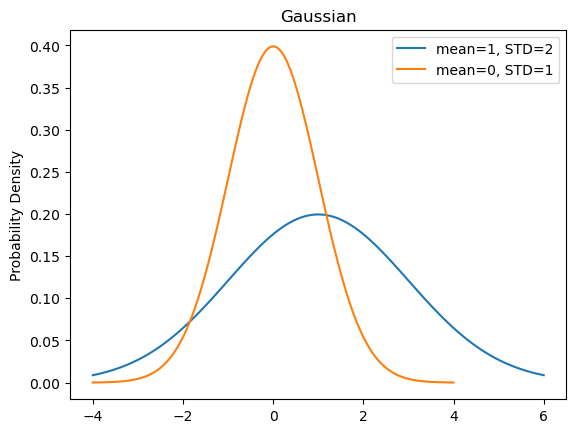

Your code PASSED all the code checks! 


In [49]:
def TEST_gaussian_distribution():
    mu, sigma = 1, 2
    mat_x_values = np.linspace(-4, 6, 120).reshape(-1, 2)
    mat_y_values = log_gaussian(mat_x_values, mu, sigma)
    print(f"mat_x_values shape: {mat_x_values.shape}")
    print(f"mat_y_values shape: {mat_y_values.shape}")
    plt.plot(mat_x_values.flatten(), np.exp(mat_y_values.flatten()), label='mean=1, STD=2')

    mu, sigma = 0, 1
    vec_x_values = np.linspace(-4, 4, 120).reshape(-1, 1)
    vec_y_values = log_gaussian(vec_x_values, mu, sigma)
    print(f"vec_x_values shape: {vec_x_values.shape}")
    print(f"vec_y_values shape: {vec_y_values.shape}")
    plt.plot(vec_x_values, np.exp(vec_y_values), label='mean=0, STD=1')
    
    plt.title(f"Gaussian")
    plt.ylabel(f"Probability Density")
    plt.legend()
    plt.show()
    todo_check([
        ("vec_y_values.shape == (120, 1)", "`vec_y_values` should have shape (120, 1)"),
        ("np.all(np.isclose(np.exp(vec_y_values.flatten()[:4]), [0.00013383, 0.00017473, 0.00022709, 0.00029382], rtol=.001))", "`vec_y_values` for the gaussian distribution seem to be incorrect!"),
        ("mat_y_values.shape == (60, 2)", "`mat_y_values` should have shape (60, 2)"),
        ("np.all(np.isclose(np.exp(mat_y_values.flatten()[:2]), [0.00876415, 0.00972625], rtol=.001))", "`mat_y_values` for the gaussian distribution seem to be incorrect!")
    ], **locals())
    
TEST_gaussian_distribution()

### Computing parameters: $\mu$ and $\sigma$

#### TODO 5 (10 points)
Implement the `compute_parameters()` function according to the pseudocode provided below. You are allowed to use NumPy functions to compute the means $\vec{\mu}$ (mu) and standard deviations (STD) $\vec{\sigma}$ (sigma). See the below inline documentation for the expected input and return values.

Note that $k$ is the current label/class, $K$ is the set of classes/labels, $M_k$ is the number of data samples with the label $k$. The output should be two NumPy arrays of shape $(|K|, N)$ where $N$ is the number of features and $|K|$ is the number of classes. Thus, row index 0 corresponds to label 0 (class 1 setosa), row index 1 corresponds to label 1 (class 2 versicolor) and row index 2 corresponds to label 2 (class 3 virginica). Likewise, column index 0 corresponds to the 1st column in the passed data `X` and column index 1 corresponds to the 2nd column in `X`, etc.

<center><img src="https://live.staticflickr.com/65535/54068925361_caaf05bf76_c.jpg" width="700" height="400" alt="gaussian-params"/></center>

**Hint**
- `np.unique()` can make it easy to find all unique labels.
- See notes for how to find data locations for a given label.

In [50]:
def compute_parameters(
    X: np.ndarray, 
    y: np.ndarray,
) -> Tuple[np.ndarray, np.ndarray]:
    """ Computes the means and standard deviations for classes and features
    
        Args:
            X: Data given as a 2D matrix 
            
            y: Labels given as a 2D column vector

        Returns:
            Two NumPy arrays corresponding to the mean and STDs for each class and feature,
            such that each array has the shape (|K|, N).
    """
    means = []
    stds = []
    K = None
    # TODO 5
    K = np.unique(y)
    for k in K:
        means.append(np.mean(X[y.flatten() == k], axis=0))
        stds.append(np.std(X[y.flatten() == k], axis=0))    
    means = np.array(means)
    stds = np.array(stds)
    
    return means, stds

In [51]:
def TEST_compute_parameters():
    """ Tests compute_parameters() with no dropped features """
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data()
    print("{:-^50}".format("No Dropped Features"))
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)

    means_df = pd.DataFrame(means, index=iris.target_names, columns=iris.feature_names)
    print("{:=^50}".format("Iris Training Data Feature Means"))
    display(means_df)
    stds_df = pd.DataFrame(stds, index=iris.target_names, columns=iris.feature_names)
    print("{:=^50}".format("Iris Training Data Feature STDs"))
    display(stds_df)

    todo_check([
        ("isinstance(means, np.ndarray)","`compute_parameters()` means must be a matrix given as a NumPy array."),
        ("means.shape == (3, X_trn.shape[-1])","`compute_parameters()` means have the shape (K=3, N=4)."),
        ("isinstance(stds, np.ndarray)","`compute_parameters()` stds must be a matrix given as a NumPy array."),
        ("stds.shape == (3, X_trn.shape[-1])","`compute_parameters()` stds have the shape (K=3, N=4)."),
        ("np.isclose(np.diagonal(means), np.array([5.053125, 2.79, 5.52941176]), rtol=.01).all()", "means has incorrect values"),
        ("np.isclose(np.diagonal(stds), np.array([0.346396, 0.305887, 0.551751]), rtol=.01).all()", "stds has incorrect values"),
    ], **locals(), success_msg="+5 points")

TEST_compute_parameters()

---------------No Dropped Features----------------
X_trn shape: (96, 4)
y_trn shape: (96, 1)
=========Iris Training Data Feature Means=========


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,5.053125,3.531250,1.459375,0.253125
versicolor,5.960000,2.790000,4.230000,1.313333
virginica,6.552941,2.988235,5.529412,2.005882


=========Iris Training Data Feature STDs==========


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.346396,0.354822,0.163668,0.114522
versicolor,0.573062,0.305887,0.485901,0.202868
virginica,0.632100,0.323369,0.551751,0.297975


Your code PASSED all the code checks! +5 points


In [52]:
def TEST_compute_parameters_with_dropped_features():
    """ Tests compute_parameters() with dropped features """
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data(
        drop_features=['sepal length (cm)', 'petal length (cm)']
    )
    print("{:-^50}".format("Dropped Features"))
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)

    means_df = pd.DataFrame(means, index=iris.target_names, columns=['sepal width (cm)', 'petal width (cm)'])
    print("{:=^50}".format("Iris Training Data Feature Means"))
    display(means_df)
    stds_df = pd.DataFrame(stds, index=iris.target_names, columns=['sepal width (cm)', 'petal width (cm)'])
    print("{:=^50}".format("Iris Training Data Feature STDs"))
    display(stds_df)

    todo_check([
        ("isinstance(means, np.ndarray)","`compute_parameters()` means must be a matrix given as a NumPy array."),
        ("means.shape == (3, X_trn.shape[-1])","`compute_parameters()` means have the shape (K=3, N=2)."),
        ("isinstance(stds, np.ndarray)","`compute_parameters()` stds must be a matrix given as a NumPy array."),
        ("stds.shape == (3, X_trn.shape[-1])","`compute_parameters()` stds have the shape (K=3, N=2)."),
        ("np.isclose(np.diagonal(means), np.array([3.53125, 1.313333]), rtol=.01).all()", "means has incorrect values"),
        ("np.isclose(np.diagonal(stds), np.array([0.354822, 0.202868]), rtol=.01).all()", "stds has incorrect values"),
    ], **locals(), success_msg="+5 points")

TEST_compute_parameters_with_dropped_features()

-----------------Dropped Features-----------------
X_trn shape: (96, 2)
y_trn shape: (96, 1)
=========Iris Training Data Feature Means=========


,sepal width (cm),petal width (cm)
setosa,3.531250,0.253125
versicolor,2.790000,1.313333
virginica,2.988235,2.005882


=========Iris Training Data Feature STDs==========


,sepal width (cm),petal width (cm)
setosa,0.354822,0.114522
versicolor,0.305887,0.202868
virginica,0.323369,0.297975


Your code PASSED all the code checks! +5 points


### Computing log likelihoods

#### TODO 6 (10 points)
Implement the `compute_log_likelihoods()` function according to the pseudocode provided below to compute the log likelihoods for each class and feature $P(X = \Xm \mid Y = y_k)$. See the below inline documentation for the expected input and return values.
<center><img src="https://live.staticflickr.com/65535/54069869109_b7ea861fbf_c.jpg" width="800" height="401" alt="log-likelihoods"/></center>

**Hint**
- Recall, the input `means` and `stds` were computed using the `compute_parameters()` function. Thus, each row of `means` and `stds` represents $\vec{\mu}_k$ and $\vec{\sigma}_k$
- You can loop over `means` and `stds` together by using `zip(means, stds)` ([example](https://realpython.com/python-zip-function/#looping-over-multiple-iterables)).
- See notes for an example of computing the class log likelihoods.

In [53]:
def compute_log_likelihoods(X, means, stds, verbose=True):
    """ Computes the log likelihoods for all classes and data samples
    
        Args:
            X: Data to compute log likelihoods given as a matrix.
            
            means: Means for each class and feature of shape (|K|, N).
            
            stds: Standard deviations for each class and feature of shape (|K|, N).

        Returns:
            NumPy matrix containing ALL class log likelihoods with shape (M, |K|) where
            M is the number of data samples in the passed data X and |K| is the number 
            of classes given by the number of rows in means and stds.
    """
    log_likelihoods = []
    # TODO 6
    for mean, std in zip(means, stds): 
        feature_log_liklihoods = log_gaussian(X, mean, std)
        class_log_likelihoods = np.sum(feature_log_liklihoods, axis=1)
        log_likelihoods.append(class_log_likelihoods)
    
    return np.column_stack(log_likelihoods)

In [54]:
def TEST_compute_log_likelihoods():
    X_trn, y_trn, _, _, _, _ = get_preprocessed_data()
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    # Compute log likelihoods
    log_likelihoods = compute_log_likelihoods(X_trn, means, stds)
    print(f"log_likelihoods shape: {log_likelihoods.shape}")
    print("{:=^50}".format("Iris Class Log Liklihoods"))
    ll_df = pd.DataFrame(log_likelihoods, columns=iris.target_names)
    display(ll_df)

    todo_check([
        ("isinstance(log_likelihoods, np.ndarray)","`compute_log_likelihoods()` output must be a matrix given as a NumPy array."),
        ("log_likelihoods.shape == (len(X_trn), 3)","`compute_log_likelihoods()` output have the shape (M=96, K=3)."),
        ("np.isclose(log_likelihoods[[0, -1]].flatten(), [-301.987372, -3.421087, -1.778485,1.321291, -39.680630, -53.953112], rtol=.01).all()", 
         "log_likelihoods has incorrect values"),
    ], **locals())
    
    return log_likelihoods
    
log_likelihoods = TEST_compute_log_likelihoods()

X_trn shape: (96, 4)
y_trn shape: (96, 1)
log_likelihoods shape: (96, 3)
============Iris Class Log Liklihoods=============


,setosa,versicolor,virginica
0,-301.987372,-3.421087,-1.778485
1,-264.934134,-1.855917,-2.940484
2,-118.492505,-2.540101,-14.519169
3,0.639322,-30.697733,-45.206904
4,-446.225174,-11.861537,-0.411029
...,...,...,...
91,-528.049243,-14.362138,-1.947856
92,1.644588,-35.362367,-49.400081
93,-235.046981,-0.597873,-4.547333
94,1.999927,-34.430266,-50.136922


Your code PASSED all the code checks! 


## GaussianNaiveBayes Class

Finally, let's combine all the functions we have defined so far into a single class. This will make training and predicting with Gaussian Naive Bayes much easier!

#### TODO 7 (15 points)
Complete the TODO by finishing the `GaussianNaiveBayes` class. You should reuse the functions `compute_log_priors()`, `compute_parameters()` and `compute_log_likelihoods()`.  Refer to the notes for help.

**TODOs for the `fit()` method**

Compute the log priors $\log P(Y = \yv_k)$ and store the output into `self.log_priors`. Compute the means and standard deviations for each class and feature. Store the outputs into `self.means` and `self.stds`.

**TODOs for the `predict()` method**

Compute the predictions by implementing the below equation.

$$
\arg \max_{k \in K} \log P(X = \Xm | Y= \yv_k) + \log P(Y = \yv_k).
$$


In [55]:
class GaussianNaiveBayes():
    """ Performs multi-classifcation using Gaussian Naive Bayes

        Attributes:
            log_priors: The log of the priors computed based on the training data 

            means: The means for each class and every feature with shape (|K|, N).

            stds: The standard deviations for each class and every feature 
                with shape (|K|, N).
    """
    def __init__(self):
        self.log_priors = None
        self.means = None
        self.stds = None
    
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Compute the log_priors, means, and STDs using training data.
        
            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 2D column vector
                
            Returns:
                The class's own object reference. 
        """
        # TODO 7
        self.log_priors = compute_log_priors(y)
        self.means, self.stds = compute_parameters(X, y)
        return self
        
    def predict(self, X: np.ndarray):
        """ Make a prediction using log maximum a posteriori (MAP)
        
            Args:
                X: Data given as a 2D matrix.

            Returns:
                Preductions given as a 2D column vctor.
        """
        # TODO 7
        log_posteriors = compute_log_likelihoods(X, self.means, self.stds) + self.log_priors
        predictions = np.argmax(log_posteriors, axis=1)
        return predictions.reshape(-1, 1)

Fake X shape: (100, 2)
Fake y shape: (100, 1)
Accuracy: 1.0


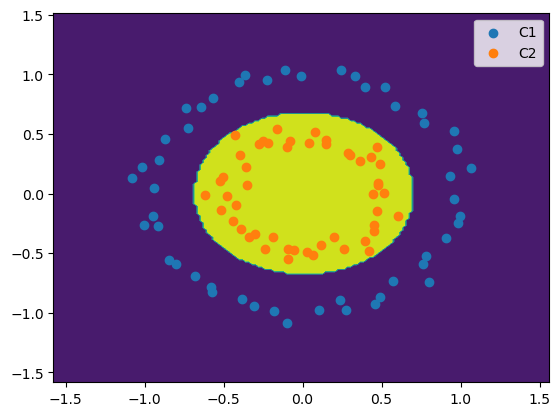

Your code PASSED all the code checks! 


In [56]:
def TEST_GaussianNaiveBayes():
    from sklearn.datasets import make_circles
    X, y = make_circles(random_state=42, factor=.5, noise=.05)
    y = y.reshape(-1, 1)
    class_names = {
        0: 'C1',
        1: 'C2',
    }
    print(f"Fake X shape: {X.shape}")
    print(f"Fake y shape: {y.shape}")
    
    gnb = GaussianNaiveBayes()
    gnb.fit(X, y)
    y_hat = gnb.predict(X)
    acc = accuracy_score(y, y_hat)
    print(f"Accuracy: {acc}")
    plot_decision_boundary(gnb=gnb, X=X, y=y, class_names=class_names)

    todo_check([
        ("acc == 1.0", "Expected accuracy was 1.0 or 100% accurate."),
        ("np.all(np.isclose(gnb.log_priors, np.array([-0.69314718, -0.69314718]), rtol=.01))", "gnb.log_priors has incorrect values"),
        ("np.all(np.isclose(gnb.means.flatten(), np.array([-0.00126599, -0.00426598,  0.00605525,  0.00029719]), rtol=.01))","gnb.means has incorrect values"),
        ("np.all(np.isclose(gnb.stds.flatten(), np.array([0.70399531,0.71180391,0.359106,0.35287701]), rtol=.01))","gnb.means has incorrect values"),
    ], **locals())
    
TEST_GaussianNaiveBayes()

# Multi-class Classification

## Petal Length and Width



#### TODO 8 (10 points)
To complete this TODO by performing multi-classification using **ONLY the petal length and width features**. Make sure the below requirements are satisfied to receive full credit.
- Data Loading
    - Load the training, validation, and test datasets so that only the  petal length and width features are used. You need to drop the sepal features.
- Training
    - Initialize an instance of `GaussianNaiveBayes()` and fit it on the training data.
    - Compute and display the training accuracy.
    - Plot the confusion matrix for the training data.
    - Plot the decision boundary for the training data.
- Validation
    - Compute and display the validation accuracy.
    - Plot the confusion matrix for the validation data.
    - Plot the decision boundary for the validation data.
- Testing
    - Compute and display the testing accuracy.
    - Plot the confusion matrix for the testing data.
    - Plot the decision boundary for the testing data.

**Hints**
- Plot the confusion matrix and decision boundary using the functions `plot_decision_boundary()` and `plot_confusion_matrix()`. Use the `class_names` variable to set the class names for each function. 

#### Training

Accuracy: 0.9479166666666666


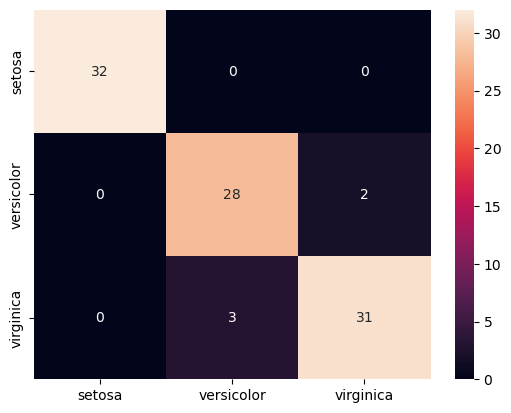

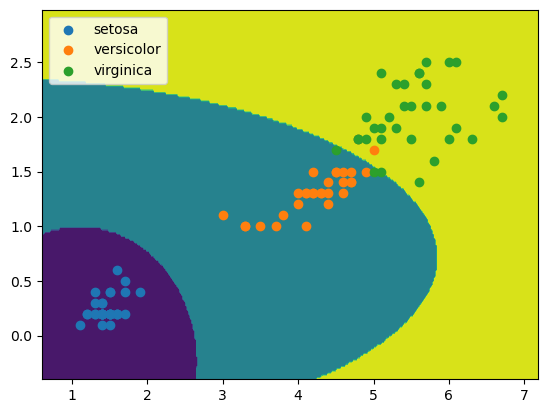

In [57]:
class_names = {
        0: 'setosa',
        1: 'versicolor',
        2: 'virginica'
    }
#### TODO 8: Training Code

# Data Loading
# Load the training, validation, and test datasets so that only the petal length and width features are used. You need to drop the sepal features.
pped_d = get_preprocessed_data(['sepal length (cm)', 'sepal width (cm)'])

# Training
# Initialize an instance of GaussianNaiveBayes() and fit it on the training data.
gnb = GaussianNaiveBayes()
gnb.fit(pped_d[0], pped_d[1])
# Compute and display the training accuracy.
y_hat = gnb.predict(pped_d[0])
acc = accuracy_score(pped_d[1], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the training data.
plot_confusion_matrix(pped_d[1], y_hat, class_names)
# Plot the decision boundary for the training data.
plot_decision_boundary(gnb=gnb, X=pped_d[0], y=pped_d[1], class_names=class_names)

#### Validation

Accuracy: 0.9583333333333334


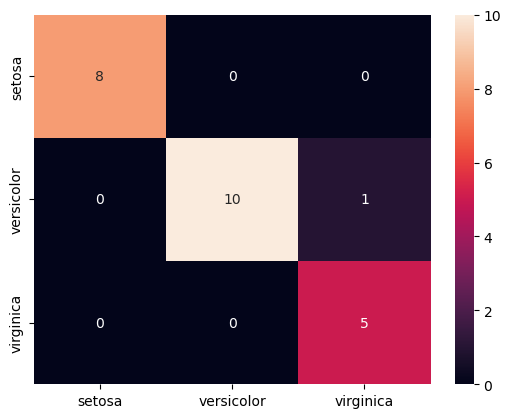

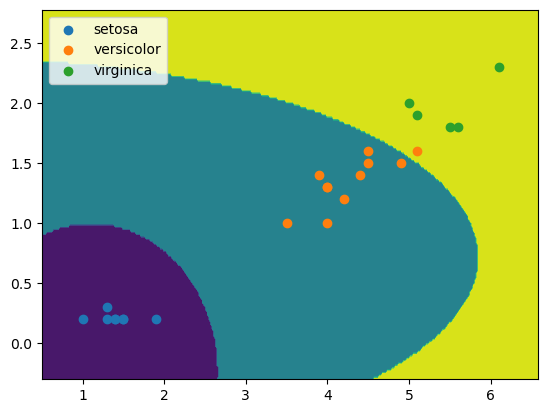

In [58]:
# Compute and display the validation accuracy.
y_hat = gnb.predict(pped_d[2])
acc = accuracy_score(pped_d[3], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the validation data.
plot_confusion_matrix(pped_d[3], y_hat, class_names)
# Plot the decision boundary for the validation data.
plot_decision_boundary(gnb=gnb, X=pped_d[2], y=pped_d[3], class_names=class_names)


#### Testing

Accuracy: 1.0


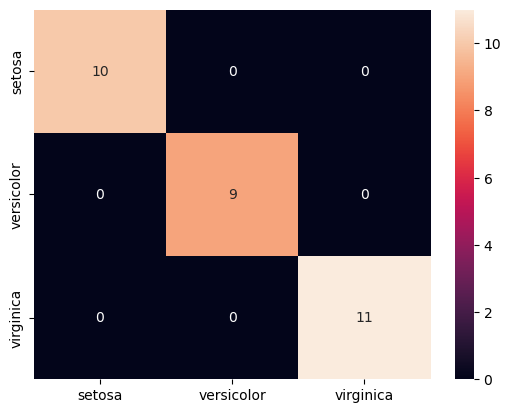

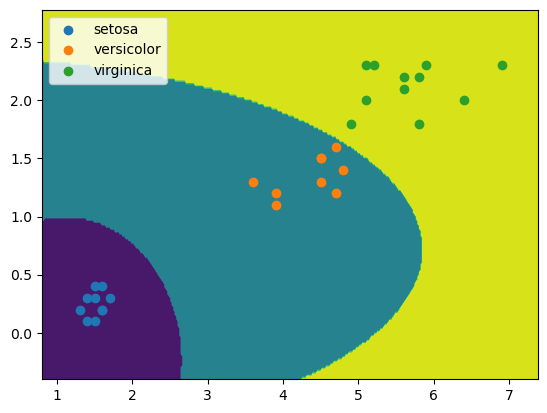

In [59]:
# TODO 8: Testing Code
# Compute and display the testing accuracy.
y_hat = gnb.predict(pped_d[4])
acc = accuracy_score(pped_d[5], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the testing data.
plot_confusion_matrix(pped_d[5], y_hat, class_names)
# Plot the decision boundary for the testing data.
plot_decision_boundary(gnb=gnb, X=pped_d[4], y=pped_d[5], class_names=class_names)

## All Features

#### TODO 9 (10 points)
To complete this TODO by performing multi-classification using **all features**. Make sure the below requirements are satisfied to receive full credit.

- Data Loading
    - Load the training, validation, and test datasets so that all features are used.
- Training
    - Initialize an instance of `GaussianNaiveBayes()` and fit it on the training data.
    - Compute and display the training accuracy.
    - Plot the confusion matrix for the training data.
- Validation
    - Compute and display the validation accuracy.
    - Plot the confusion matrix for the validation data.
- Testing
    - Compute and display the testing accuracy.
    - Plot the confusion matrix for the testing data.

#### Training

Accuracy: 0.9375


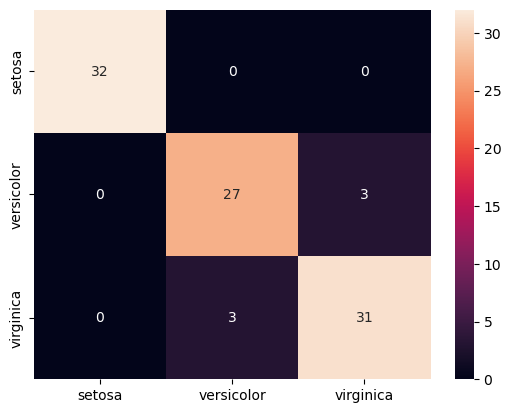

,setosa,versicolor,virginica
setosa,32,0,0
versicolor,0,27,3
virginica,0,3,31


In [60]:
class_names = {
        0: 'setosa',
        1: 'versicolor',
        2: 'virginica'
    }
#### TODO 9: Training Code

# Data Loading
# Load the training, validation, and test datasets so that only the petal length and width features are used. You need to drop the sepal features.
pped_d = get_preprocessed_data(None)

# Training
# Initialize an instance of GaussianNaiveBayes() and fit it on the training data.
gnb = GaussianNaiveBayes()
gnb.fit(pped_d[0], pped_d[1])
# Compute and display the training accuracy.
y_hat = gnb.predict(pped_d[0])
acc = accuracy_score(pped_d[1], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the training data.
plot_confusion_matrix(pped_d[1], y_hat, class_names)

#### Validation

Accuracy: 0.9583333333333334


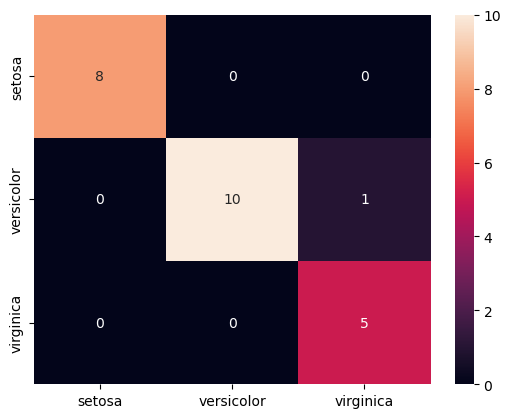

,setosa,versicolor,virginica
setosa,8,0,0
versicolor,0,10,1
virginica,0,0,5


In [61]:
# TODO 9: Validation Code
# Compute and display the validation accuracy.
y_hat = gnb.predict(pped_d[2])
acc = accuracy_score(pped_d[3], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the validation data.
plot_confusion_matrix(pped_d[3], y_hat, class_names)

#### Testing

Accuracy: 1.0


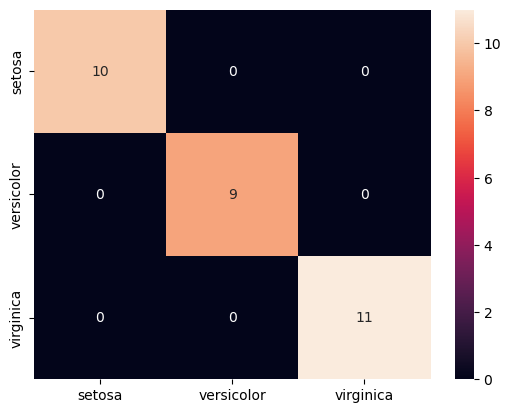

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


In [62]:
# TODO 8: Testing Code
# Compute and display the testing accuracy.
y_hat = gnb.predict(pped_d[4])
acc = accuracy_score(pped_d[5], y_hat)
print(f"Accuracy: {acc}")
# Plot the confusion matrix for the testing data.
plot_confusion_matrix(pped_d[5], y_hat, class_names)

## Performance Comparison 

#### TODO 10: (10 points)
In a short report (1-2 paragraphs), report on the performance of your `GaussianNaiveBayes` models by comparing the performance when using petal features verses using all features. To receive full credit, make sure ALL the following points are addressed in detail:

- Compare and contrast the training, validation, and testing performances when using just petal features (TODO 8) and when using all features (TODO 9).
- If there are any differences in performance, refer to and cite the confusion matrices to see which classes were misclassified, leading to worse performance.


`TODO 10` Write your thoughts in the below markdown cell next to the words `Answer:` 

DO NOT WRITE YOUR ANSWER IN THIS CELL!



`Answer:` 

Impressively, the accuracy of both experiments on the testing data was 100%, meaning that very single flower was correctly classified. Interestingly, the validations were both imperfect but still identical, with both coming up to exactly 0.9583333333333334. The confusion matrix shows the same single misclassification on both, where they classify a versicolor	as a virginica. As such, the only differences in the performances of the models were in the training accuracies. When only using petal features, the accuracy of the training data was 0.9479166666666666 which was slightly higher than 0.9375, the accuracy of the training data when using all features. When only using petal features, the model falsely predicted 3 virginicas and versicolors and 2 versicolors as virginicas. The more informed model misclassified one more versicolor as a virginica. 